In [1]:
# set up the environment
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

Confirming that $e^{\pm j \phi} = \cos(\phi) \pm j\sin(\phi)$ falls in the unit circle of the complex plane:

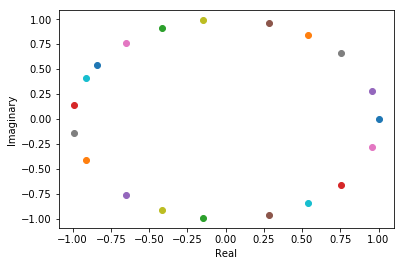

In [2]:
phis = range(-10,10) # change this value to use more points

for phi in phis:
    
    out = np.cos(phi) + 1j*np.sin(phi)
    
    plt.plot(np.real(out),np.imag(out),'o')

plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()


Let's now turn $\phi$ into the DFT kernel $\frac{2\pi kn}{N}$, and visualize some DFT sinusoids. For now, let's say that $N=100$, and we know that $n \in (0,N-1)$, and $k \in (0,N-1)$.

C:\Users\Owner\Anaconda2\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


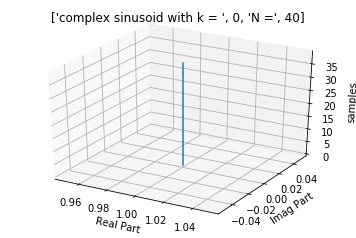

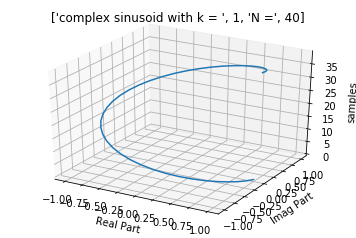

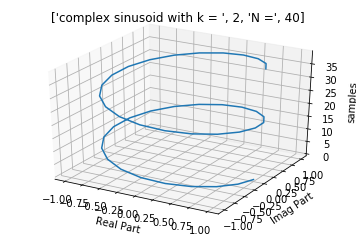

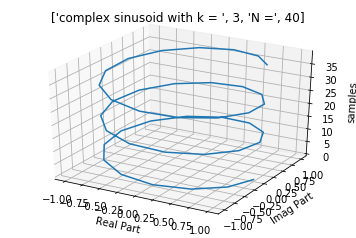

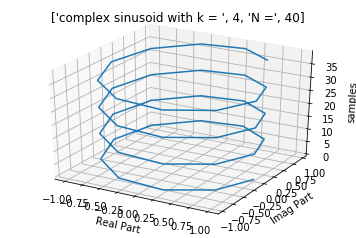

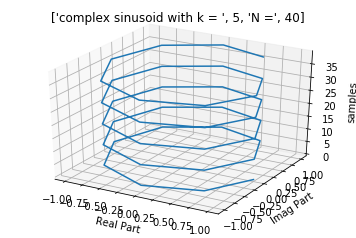

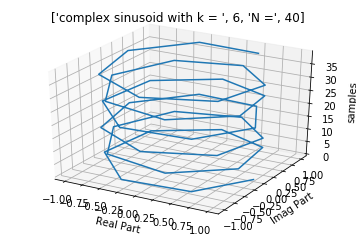

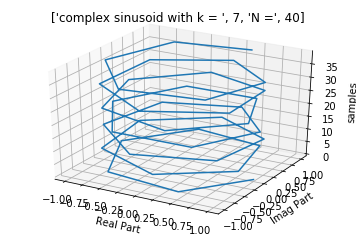

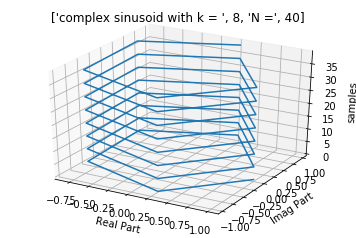

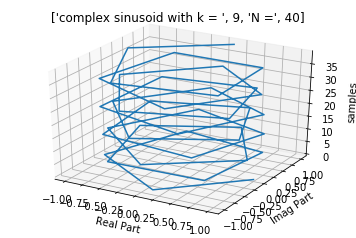

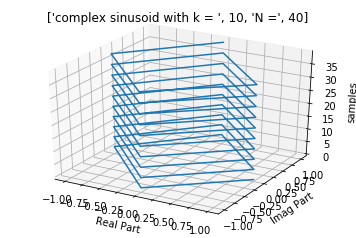

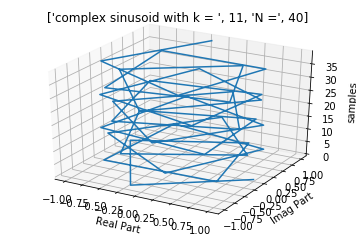

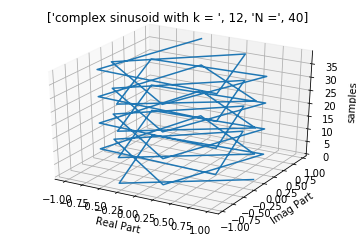

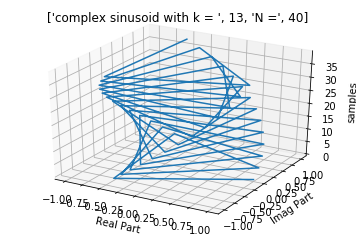

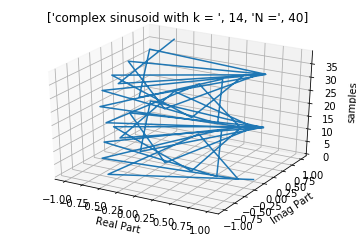

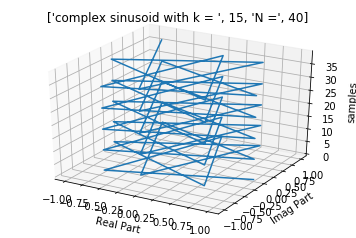

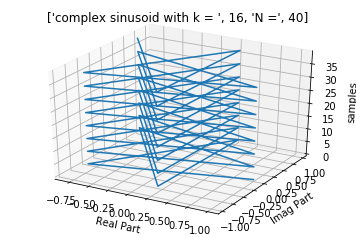

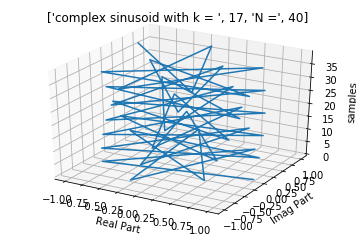

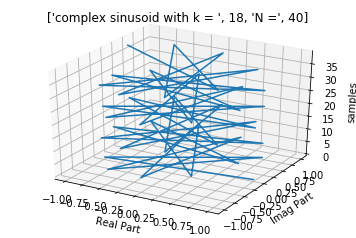

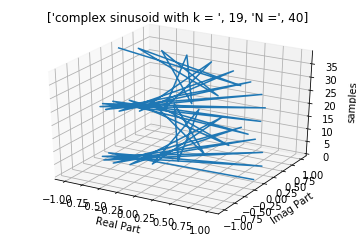

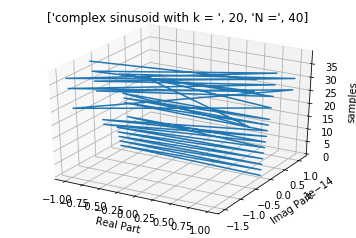

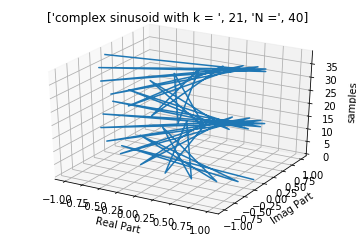

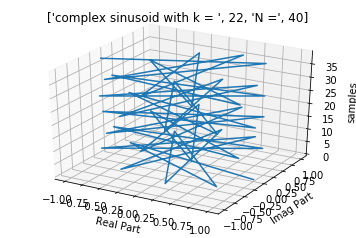

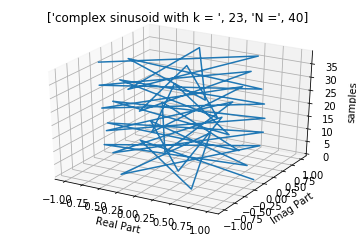

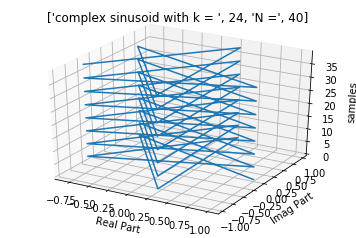

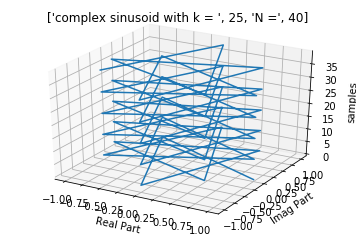

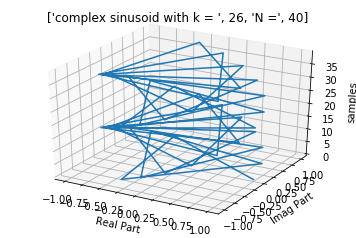

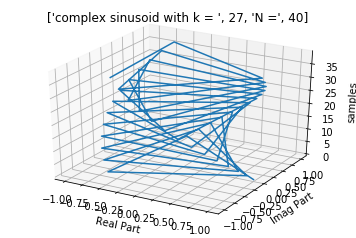

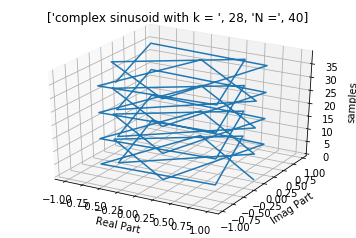

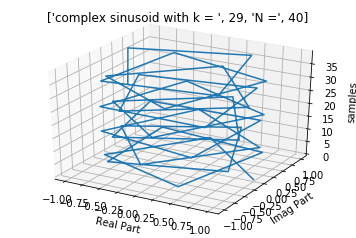

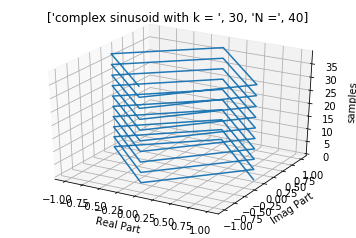

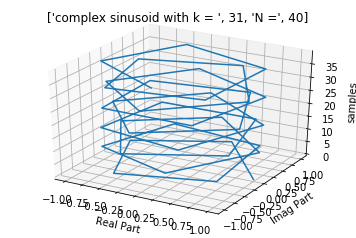

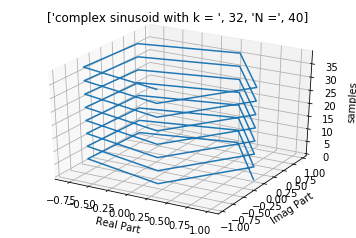

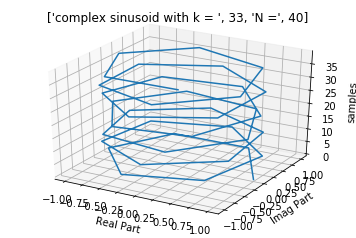

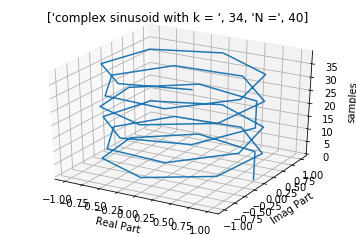

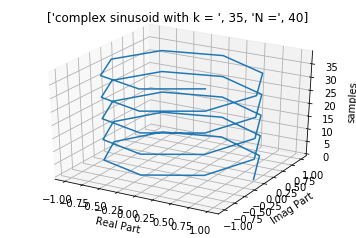

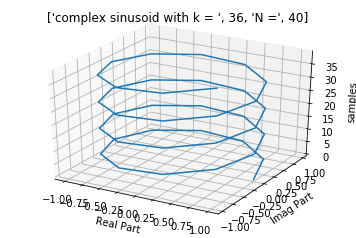

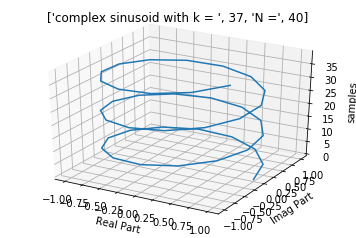

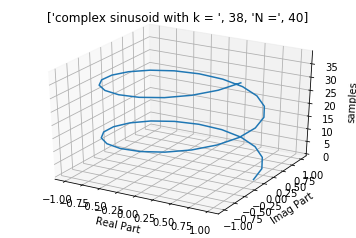

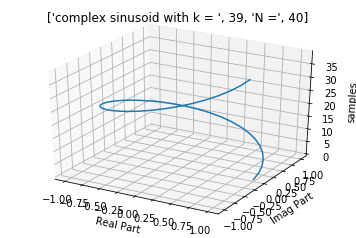

In [3]:
from mpl_toolkits.mplot3d import Axes3D

N = 40
ns = range(0,N)
ks = range(0,N)

for k in ks:
    
    samp = np.zeros([N,1], dtype=np.complex)
    
    for n in ns:
    
        samp[n] = np.cos(2*np.pi*ks[k]*ns[n]/N) - 1j*np.sin(2*np.pi*ks[k]*ns[n]/N)
        
    fig = plt.figure(k)
    ax = fig.gca(projection='3d')
    ax.plot(np.real(samp),np.imag(samp),ns)
    ax.set_title(['complex sinusoid with k = ', k,'N =', N])
    ax.set_xlabel('Real Part')
    ax.set_ylabel('Imag Part')
    ax.set_zlabel('samples')

Now we generate a DFT matrix with dimensions $N\times N$, where rows are each of the values of $k \in (0,N-1)$, and columns are each of the values of $n \in (0,N-1)$

In [18]:
N = 100
ns = range(0,N)
ks = range(0,N)

DFT_mat = np.zeros([N,N], dtype=np.complex)

for k in ks:
    
    for n in ns:
    
        DFT_mat[k,n] = np.cos(2*np.pi*ks[k]*ns[n]/N) - 1j*np.sin(2*np.pi*ks[k]*ns[n]/N)
        

The DFT matrix, transports us between two domains: time domain $\iff$ frequency domain.
With this DFT matrix, we can convert a time-domain signal that is $N$ samples long into its frequency domain representation.

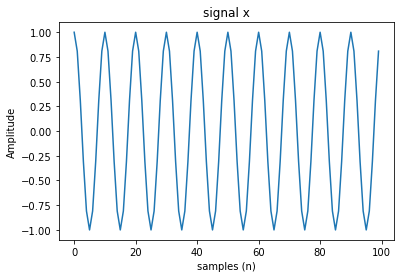

In [47]:
# generate a mock signal that is N samples long:

x = np.cos(2*np.pi*10*np.asarray(ns)/N)

plt.plot(x)
plt.title('signal x')
plt.xlabel('samples (n)')
plt.ylabel('Amplitude')
plt.show()

To apply the DFT matrix to our signal, we have to carry out a matrix vector multiplication. 

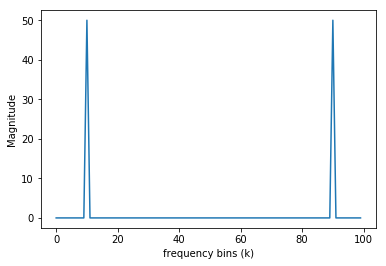

In [45]:
X= np.dot(DFT_mat,x)

plt.plot(np.abs(X))
plt.xlabel('frequency bins (k)')
plt.ylabel('Magnitude')
plt.show()